<a href="https://colab.research.google.com/github/gaso/tipologia_heart-attack-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 100%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipología y ciclo de vida de los datos</p>
<p style="margin: 0; text-align:right;">2023-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;"><b>Integrantes:</b> Gustavo Salgado Ocampo - Carlos Andres Rivera Rivera</p>

</div>
<div style="width:100%;">&nbsp;</div>

<h1>Análisis y predicción de ataques al corazón</h1>

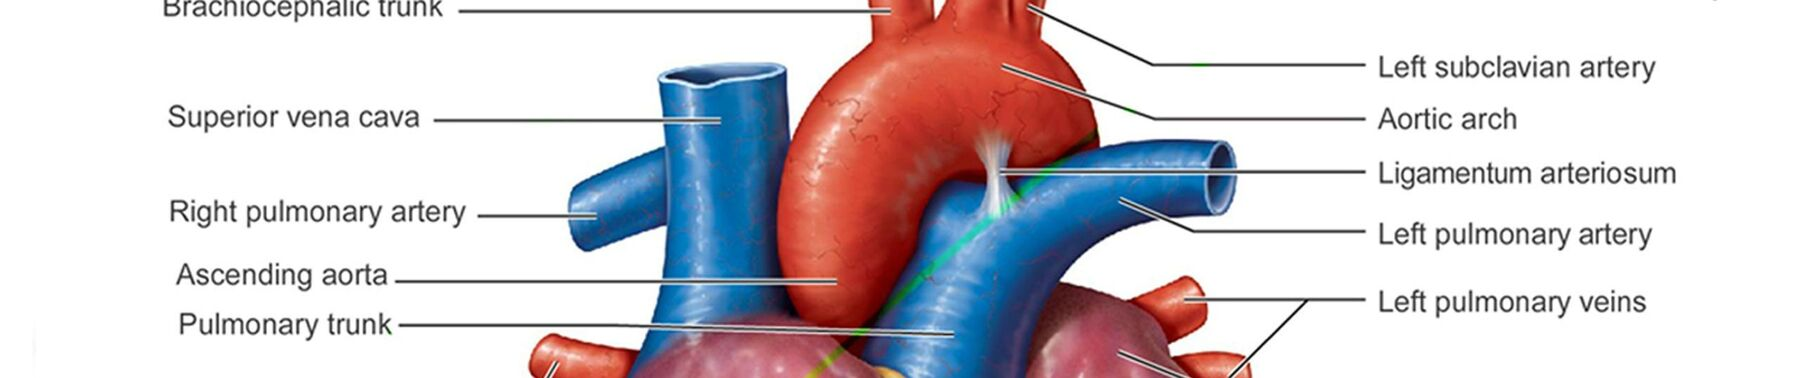

<h2>Tabla de contenido</h2>

1. [Descripción del dataset](#descripcion-dataset)
2. [Integración y selección ](#integracion-y-seleccion)
3. [Limpieza de los datos](#limpieza-de-los-datos)

Cargue de Librerias

In [121]:
suppressMessages(install.packages('ggplot2'))
suppressMessages(install.packages("corrplot"))
suppressMessages(install.packages("gridExtra"))
suppressMessages(install.packages("car"))

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”


Usar librerias

In [ ]:
suppressPackageStartupMessages(library(dplyr))
library(ggplot2)
library(scales)
library(corrplot)
library(gridExtra)
library(car)

corrplot 0.92 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




# 1. Descripción del dataset <a id="descripcion-dataset"></a>

**¿Por qué es importante y qué pregunta/problema
pretende responder?**

El conjunto de datos contiene información relevante sobre la salud 
cardiovascular de los pacientes, abarcando diferentes variables de interés. Su importancia radica en que nos brinda la oportunidad de analizar y comprender los posibles factores que pueden influir en la probabilidad de sufrir un ataque cardíaco.

El objetivo principal de este conjunto de datos es responder a la pregunta fundamental de cómo determinar la probabilidad de un ataque cardíaco en función de las características y mediciones específicas de cada paciente. A través del estudio de variables como la edad, el sexo, los síntomas de angina, la presión arterial, los niveles de colesterol, entre otros, podemos identificar posibles patrones o factores de riesgo asociados a las enfermedades cardiovasculares.

Esta información resulta valiosa para contribuir en la creación de estrategias de prevención y tratamiento de enfermedades cardíacas.

## 1.1 Carga del dataset

In [ ]:
path= 'https://raw.githubusercontent.com/gaso/tipologia_heart-attack-analysis/main/dataset/heart.csv'
data <- read.csv(path, row.names=NULL)

str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : int  1 2 2 2 2 1 2 3 3 2 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


El conjunto de datos contiene **303** observaciones y **14** variables. 

- **age:** La edad del paciente (variable numérica).

- **sex:** El sexo del paciente (1: masculino, 0: femenino) (variable numérica).

- **cp:** Tipo de dolor en el pecho (variable numérica).
  - Valor 0: angina típica
  - Valor 1: angina atípica
  - Valor 2: dolor no anginoso
  - Valor 3: asintomático

- **trtbps:** Presión arterial en reposo (variable numérica).

- **chol:** Nivel de colesterol en mg/dL (variable numérica).

- **fbs:** Nivel de azúcar en la sangre en ayunas (1: superior a 120 mg/dL, 0: inferior a 120 mg/dL) (variable numérica).

- **restecg:** Resultados del electrocardiograma en reposo (variable numérica).

- **thalachh:** Frecuencia cardíaca máxima alcanzada (variable numérica).

- **exng:** Angina inducida por ejercicio (1: sí, 0: no) (variable numérica).

- **oldpeak:** Depresión del ST inducida por el ejercicio en relación con el descanso (variable numérica).

- **slp:** Pendiente del segmento ST de ejercicio (variable numérica).

- **caa:** Número de vasos principales coloreados por fluoroscopia (variable numérica).

- **thall:** Resultados de las pruebas de estrés con talio (variable numérica).

- **output:** Variable de salida, 1 si la persona tiene enfermedad cardíaca y 0 si no la tiene (variable numérica).

Resumen de datos que contiene el dataset

In [ ]:
head(data)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [ ]:
# Obtener los nombres de las columnas del dataset
column_names <- colnames(data)

# Identificar las columnas categóricas
cat_cols <- column_names[sapply(data, function(x) is.factor(x) | is.character(x))]

# Identificar las columnas continuas
con_cols <- column_names[sapply(data, function(x) is.numeric(x))]

# Identificar la columna objetivo (si se conoce)
target_col <- "output"

# Imprimir la información
cat("Variables Categoricas Identificadas : ", cat_cols, "\n")
cat("Variables Continuas identificadas : ", con_cols, "\n")
cat("La Variable Objetivo es :  ", target_col, "\n")




Variables Categoricas Identificadas :   
Variables Continuas identificadas :  age sex cp trtbps chol fbs restecg thalachh exng oldpeak slp caa thall output 
La Variable Objetivo es :   output 


La información anterior muestra que la no identificación correcta de las variables categoricas ('sex','exng','caa','cp','fbs','restecg','slp','thall') con lo que realizaremos la transformación en base a la descripción del dataset

## Comprobar Unicos

In [ ]:
# Crear un vector para almacenar los resultados
result <- vector("list", length = ncol(data))

# Obtener los valores únicos y su cuenta para cada variable
for (i in 1:ncol(data)) {
  column <- colnames(data)[i]
  unique_values <- unique(data[[column]])
  unique_count <- length(unique_values)
  
  # Almacenar los resultados en el vector
  result[[i]] <- c(Variable = column, Valores_Unicos = unique_count)
}

# Convertir el vector en un dataframe
result <- do.call(rbind, result)

result


Variable,Valores_Unicos
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


**Analisis de la salida**

- Se determinó que las variables categóricas son aquellas que tienen un valor bajo y las variables numéricas son aquellas que tienen un valor elevado en valores únicos.
- En este contexto las Variables Numérica son: "age", "trtbps", "chol", "thalachh" y "oldpeak"
- Variables Categoricas: "sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"


Otra forma de identificar este tipo de variables, es de la siguiente manera:

In [ ]:
# Identificar las columnas categóricas
cat_cols <- column_names[sapply(data, function(x) is.factor(x) | is.character(x))]

# Identificar las columnas continuas
con_cols <- column_names[sapply(data, function(x) is.numeric(x))]

cat("Variables Categoricas Identificadas : ", cat_cols, "\n")
cat("Variables Continuas identificadas : ", con_cols, "\n")

Variables Categoricas Identificadas :   
Variables Continuas identificadas :  age sex cp trtbps chol fbs restecg thalachh exng oldpeak slp caa thall output 


In [ ]:
data$sex <- as.factor(data$sex)
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exng <- as.factor(data$exng)
data$slp <- as.factor(data$slp)
data$caa <- as.factor(data$caa)
data$thall <- as.factor(data$thall)

In [ ]:
str(data)
summary(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 1 2 1 2 1 2 2 2 ...
 $ cp      : Factor w/ 4 levels "0","1","2","3": 4 3 2 2 1 1 2 2 3 3 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 2 1 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 1 2 1 2 2 2 1 2 2 2 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : Factor w/ 3 levels "0","1","2": 1 1 3 3 3 2 2 3 3 3 ...
 $ caa     : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ thall   : Factor w/ 4 levels "0","1","2","3": 2 3 3 3 3 2 3 4 4 3 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


      age        sex     cp          trtbps           chol       fbs    
 Min.   :29.00   0: 96   0:143   Min.   : 94.0   Min.   :126.0   0:258  
 1st Qu.:47.50   1:207   1: 50   1st Qu.:120.0   1st Qu.:211.0   1: 45  
 Median :55.00           2: 87   Median :130.0   Median :240.0          
 Mean   :54.37           3: 23   Mean   :131.6   Mean   :246.3          
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:274.5          
 Max.   :77.00                   Max.   :200.0   Max.   :564.0          
 restecg    thalachh     exng       oldpeak     slp     caa     thall  
 0:147   Min.   : 71.0   0:204   Min.   :0.00   0: 21   0:175   0:  2  
 1:152   1st Qu.:133.5   1: 99   1st Qu.:0.00   1:140   1: 65   1: 18  
 2:  4   Median :153.0           Median :0.80   2:142   2: 38   2:166  
         Mean   :149.6           Mean   :1.04           3: 20   3:117  
         3rd Qu.:166.0           3rd Qu.:1.60           4:  5          
         Max.   :202.0           Max.   :6.20            

## 3. Limpieza de los datos <a id="limpieza-de-los-datos"></a>

## 3.1 Comprobar valores nulos en conjunto de datos

In [ ]:
colSums(is.na(data))

sum(is.na(data))

age      sex       cp   trtbps     chol      fbs  restecg thalachh 
       0        0        0        0        0        0        0        0 
    exng  oldpeak      slp      caa    thall   output 
       0        0        0        0        0        0

[1] 0

In [ ]:
duplicated_rows <- data[duplicated(data), ]
duplicated_rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<int>
165,38,1,2,138,175,0,1,173,0,0,2,4,2,1


## 3.3 Eliminar los duplicados

In [ ]:
data <- distinct(data)

## 3.4 Comprobar tamaño despues del ajuste 

In [ ]:
dim(data)

[1] 302  14

## 3.5 Comprobar valores extremos

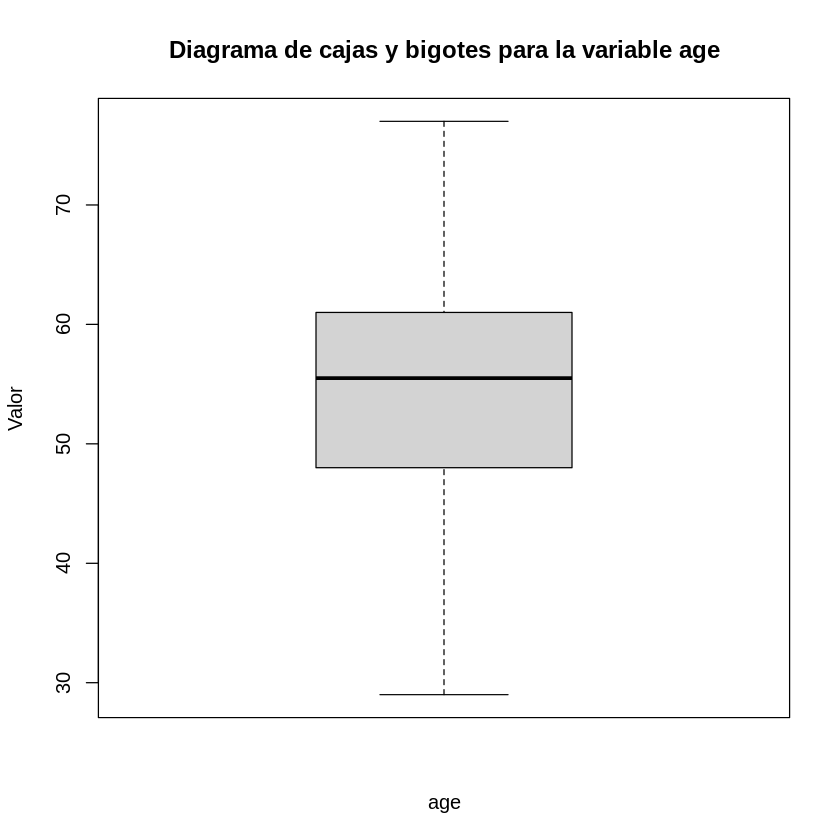

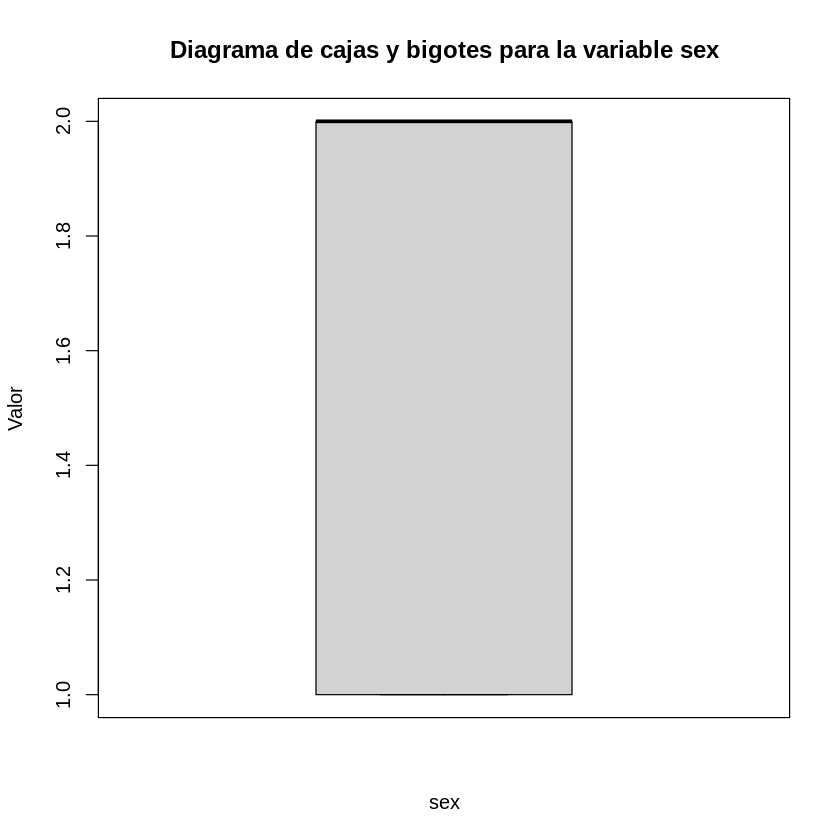

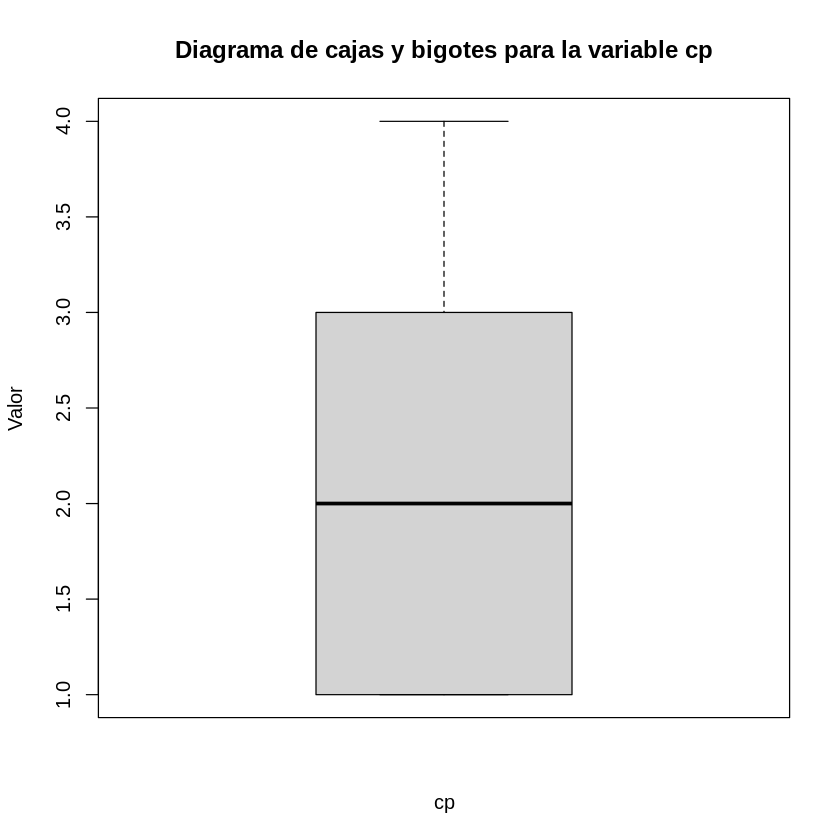

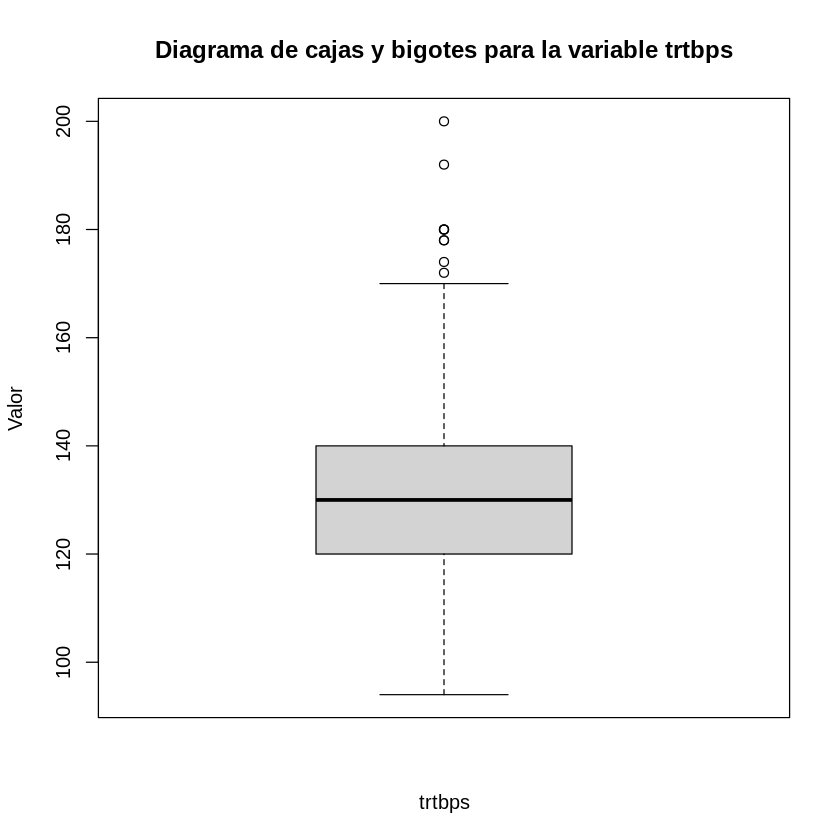

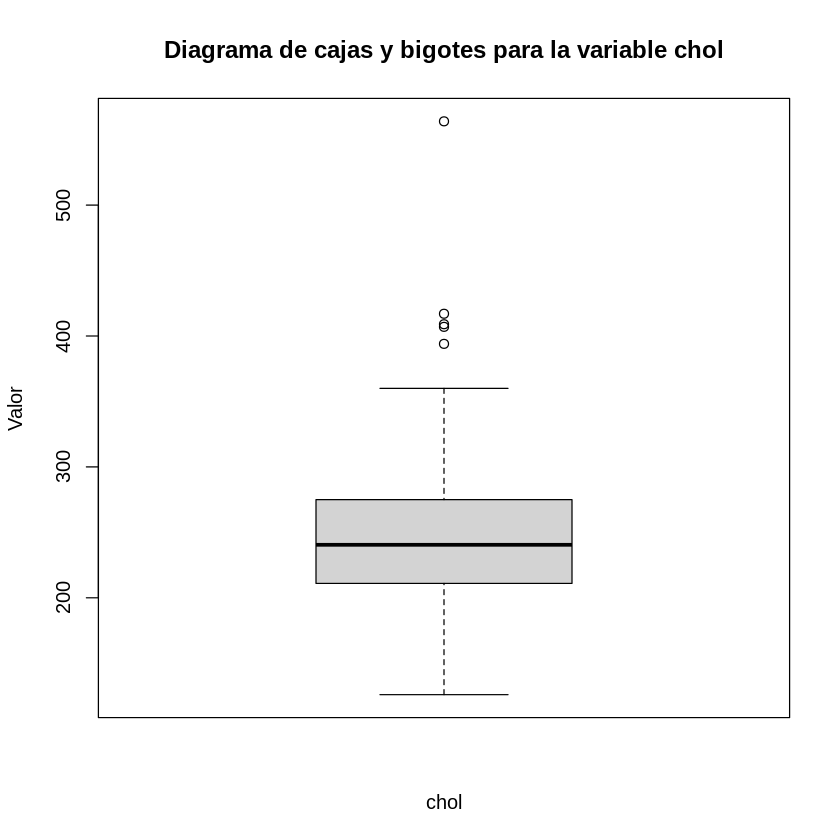

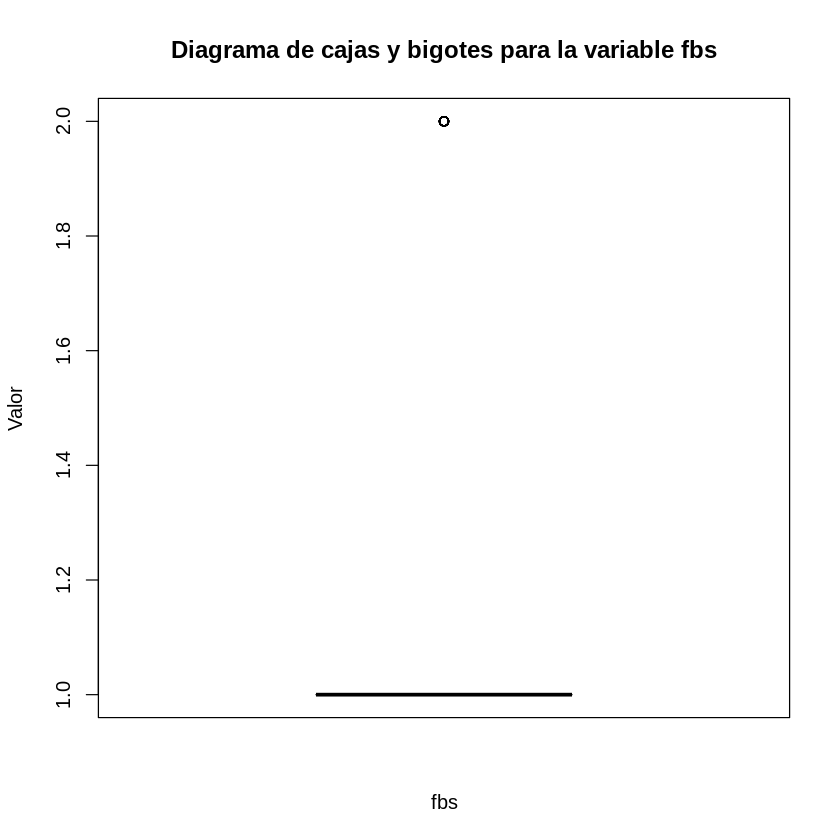

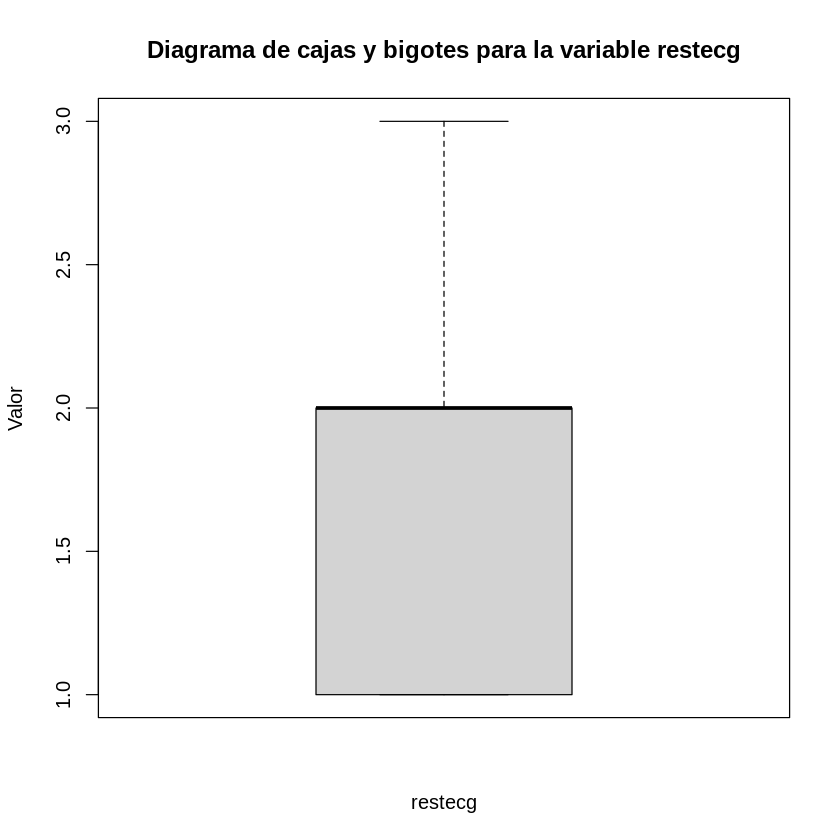

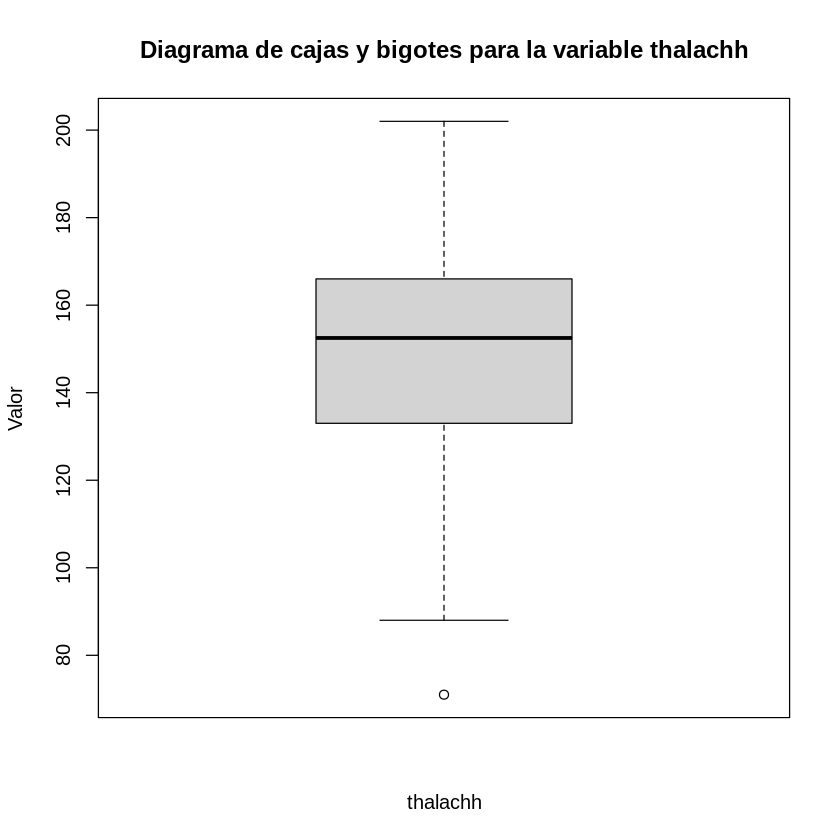

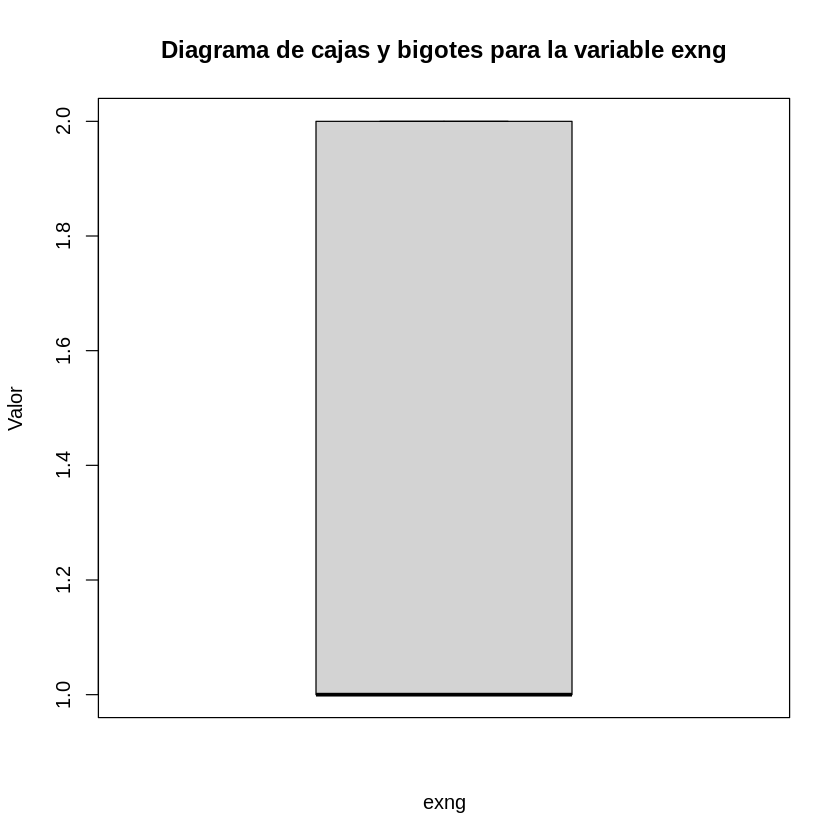

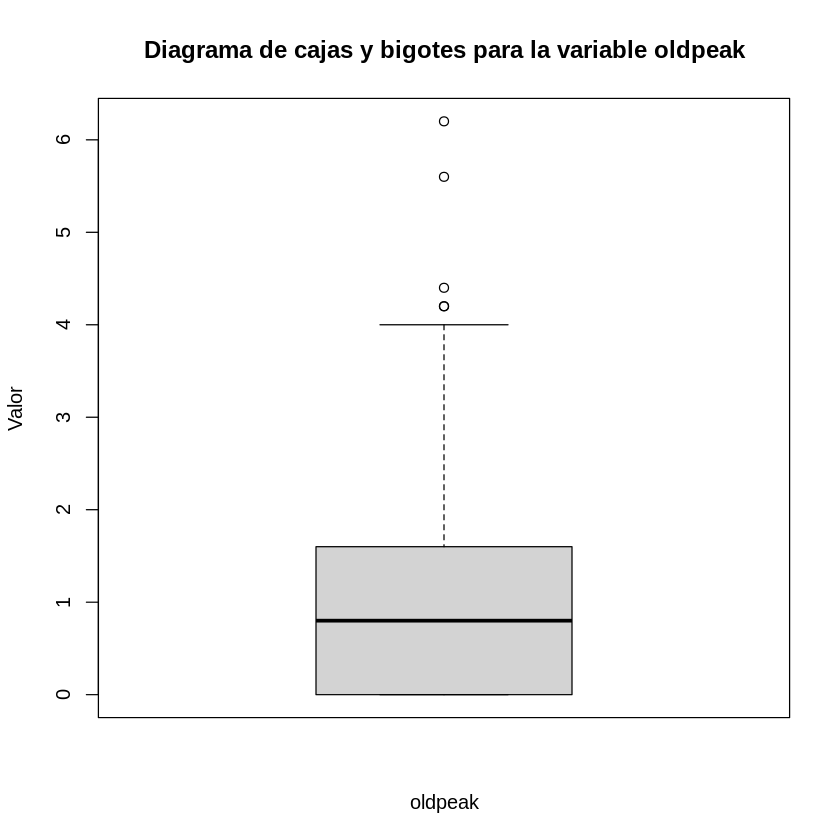

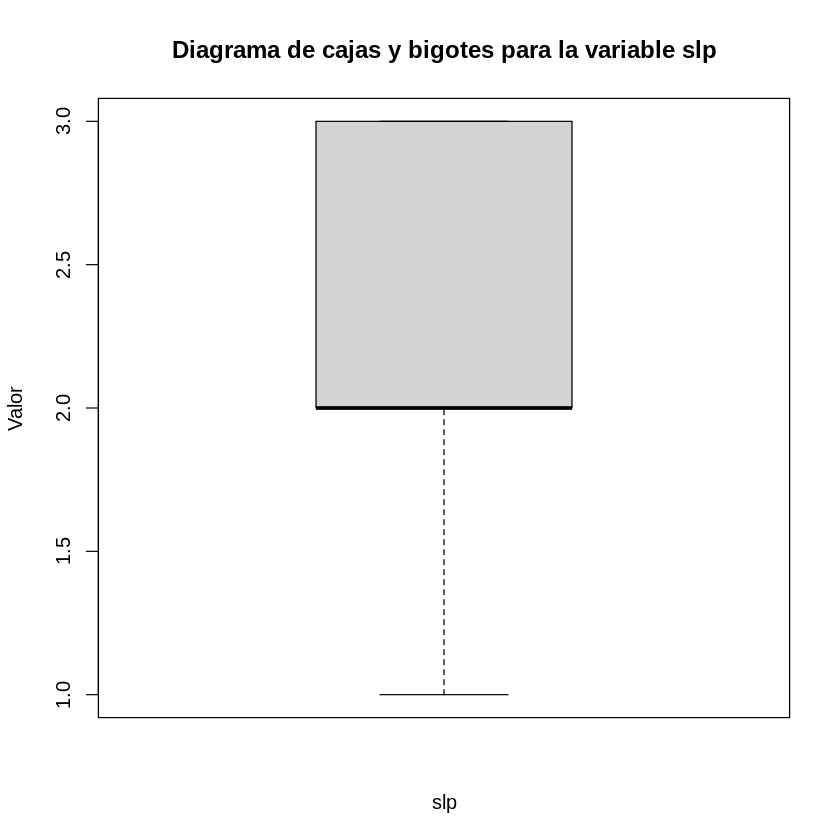

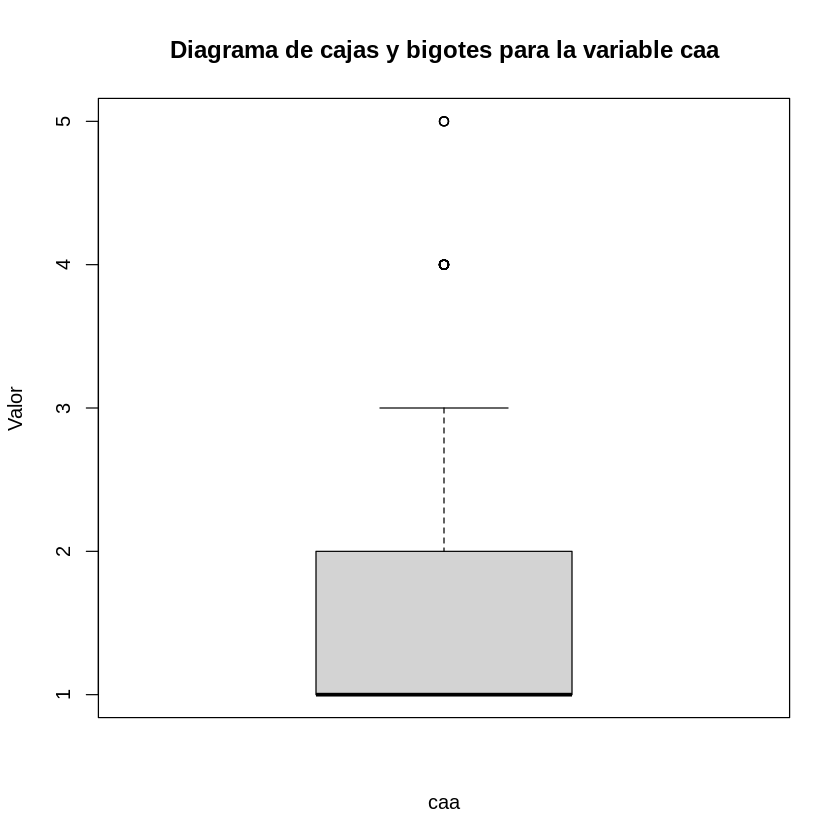

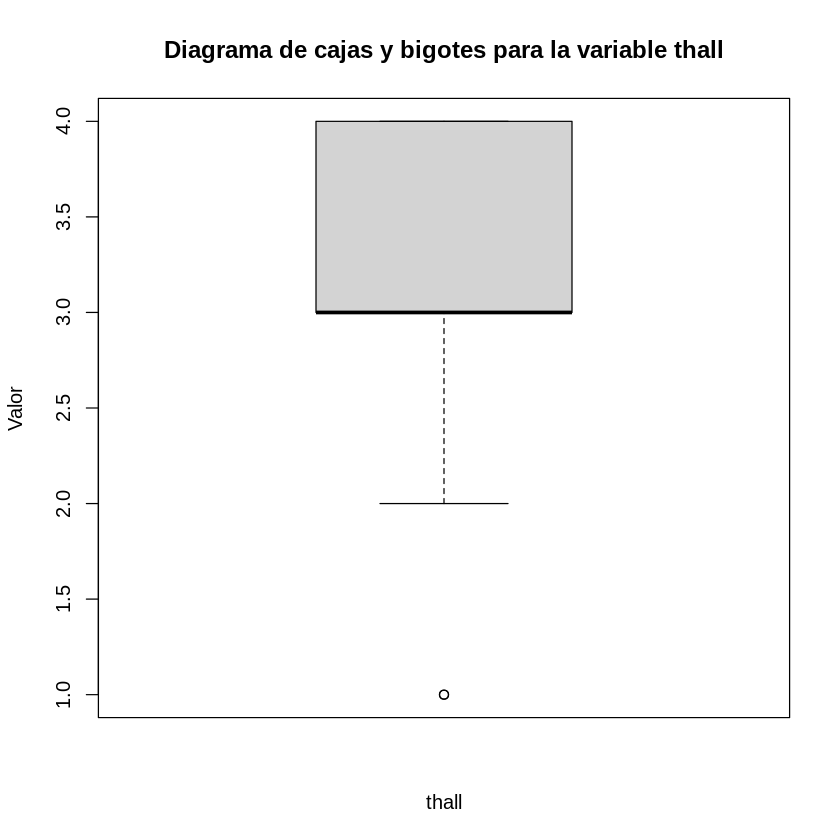

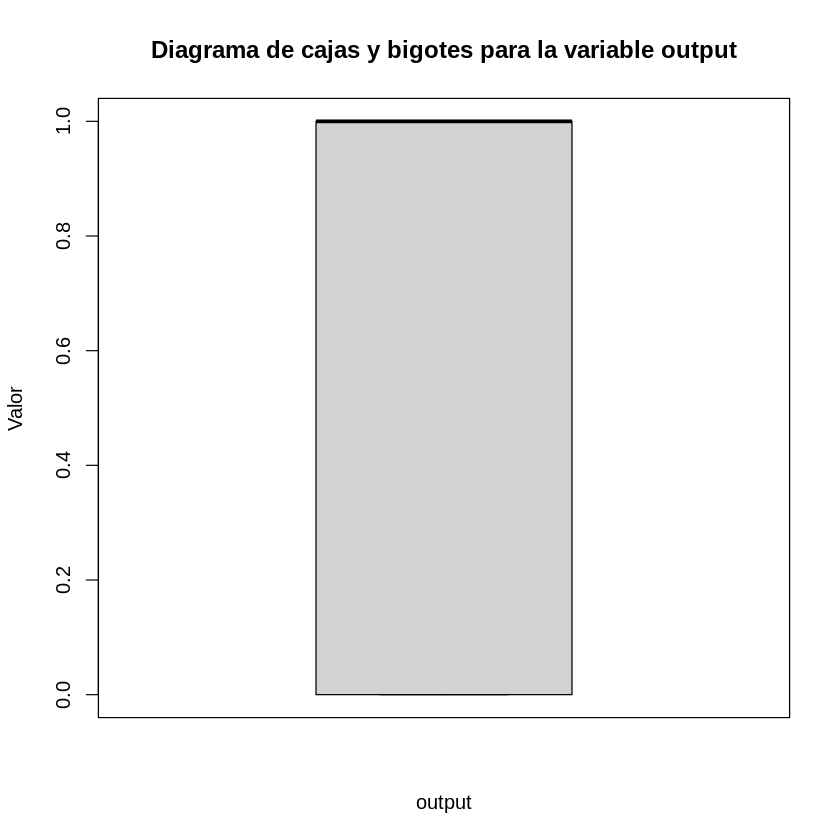

In [ ]:
# Obtener la lista de variables del dataframe
variables <- colnames(data)

# Crear el diagrama de cajas y bigotes para cada variable
for (variable in variables) {
  # Crear el diagrama de cajas y bigotes
  boxplot(data[, variable], 
          main = paste("Diagrama de cajas y bigotes para la variable", variable),
          xlab = variable,
          ylab = "Valor")
}

## Eliminar valores atipicos

In [ ]:
# Convertir todas las variables excepto "sex", "fbs", "cp", "restecg", "exng", "slp", "caa", "thall", "output" a numéricas
non_fbs_columns <- colnames(data)[!(colnames(data) %in% c("sex", "fbs", "cp", "restecg", "exng", "slp", "caa", "thall", "output"))]
data[non_fbs_columns] <- sapply(data[non_fbs_columns], as.numeric)


# Calcular los límites de los valores atípicos para cada variable excepto "fbs"
q1 <- apply(data[non_fbs_columns], 2, quantile, probs = 0.25)
q3 <- apply(data[non_fbs_columns], 2, quantile, probs = 0.75)
iqr <- q3 - q1
upper <- q3 + 1.5 * iqr
lower <- q1 - 1.5 * iqr

# Identificar las filas que contienen valores atípicos en variables excepto "fbs"
outliers <- apply(data[non_fbs_columns], 1, function(x) any(x < lower | x > upper))

# Eliminar las filas con valores atípicos en variables excepto "fbs"
data <- data[!outliers, ]

# 4. Análisis de datos

## Distribución de las variables categóricas

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 3)”


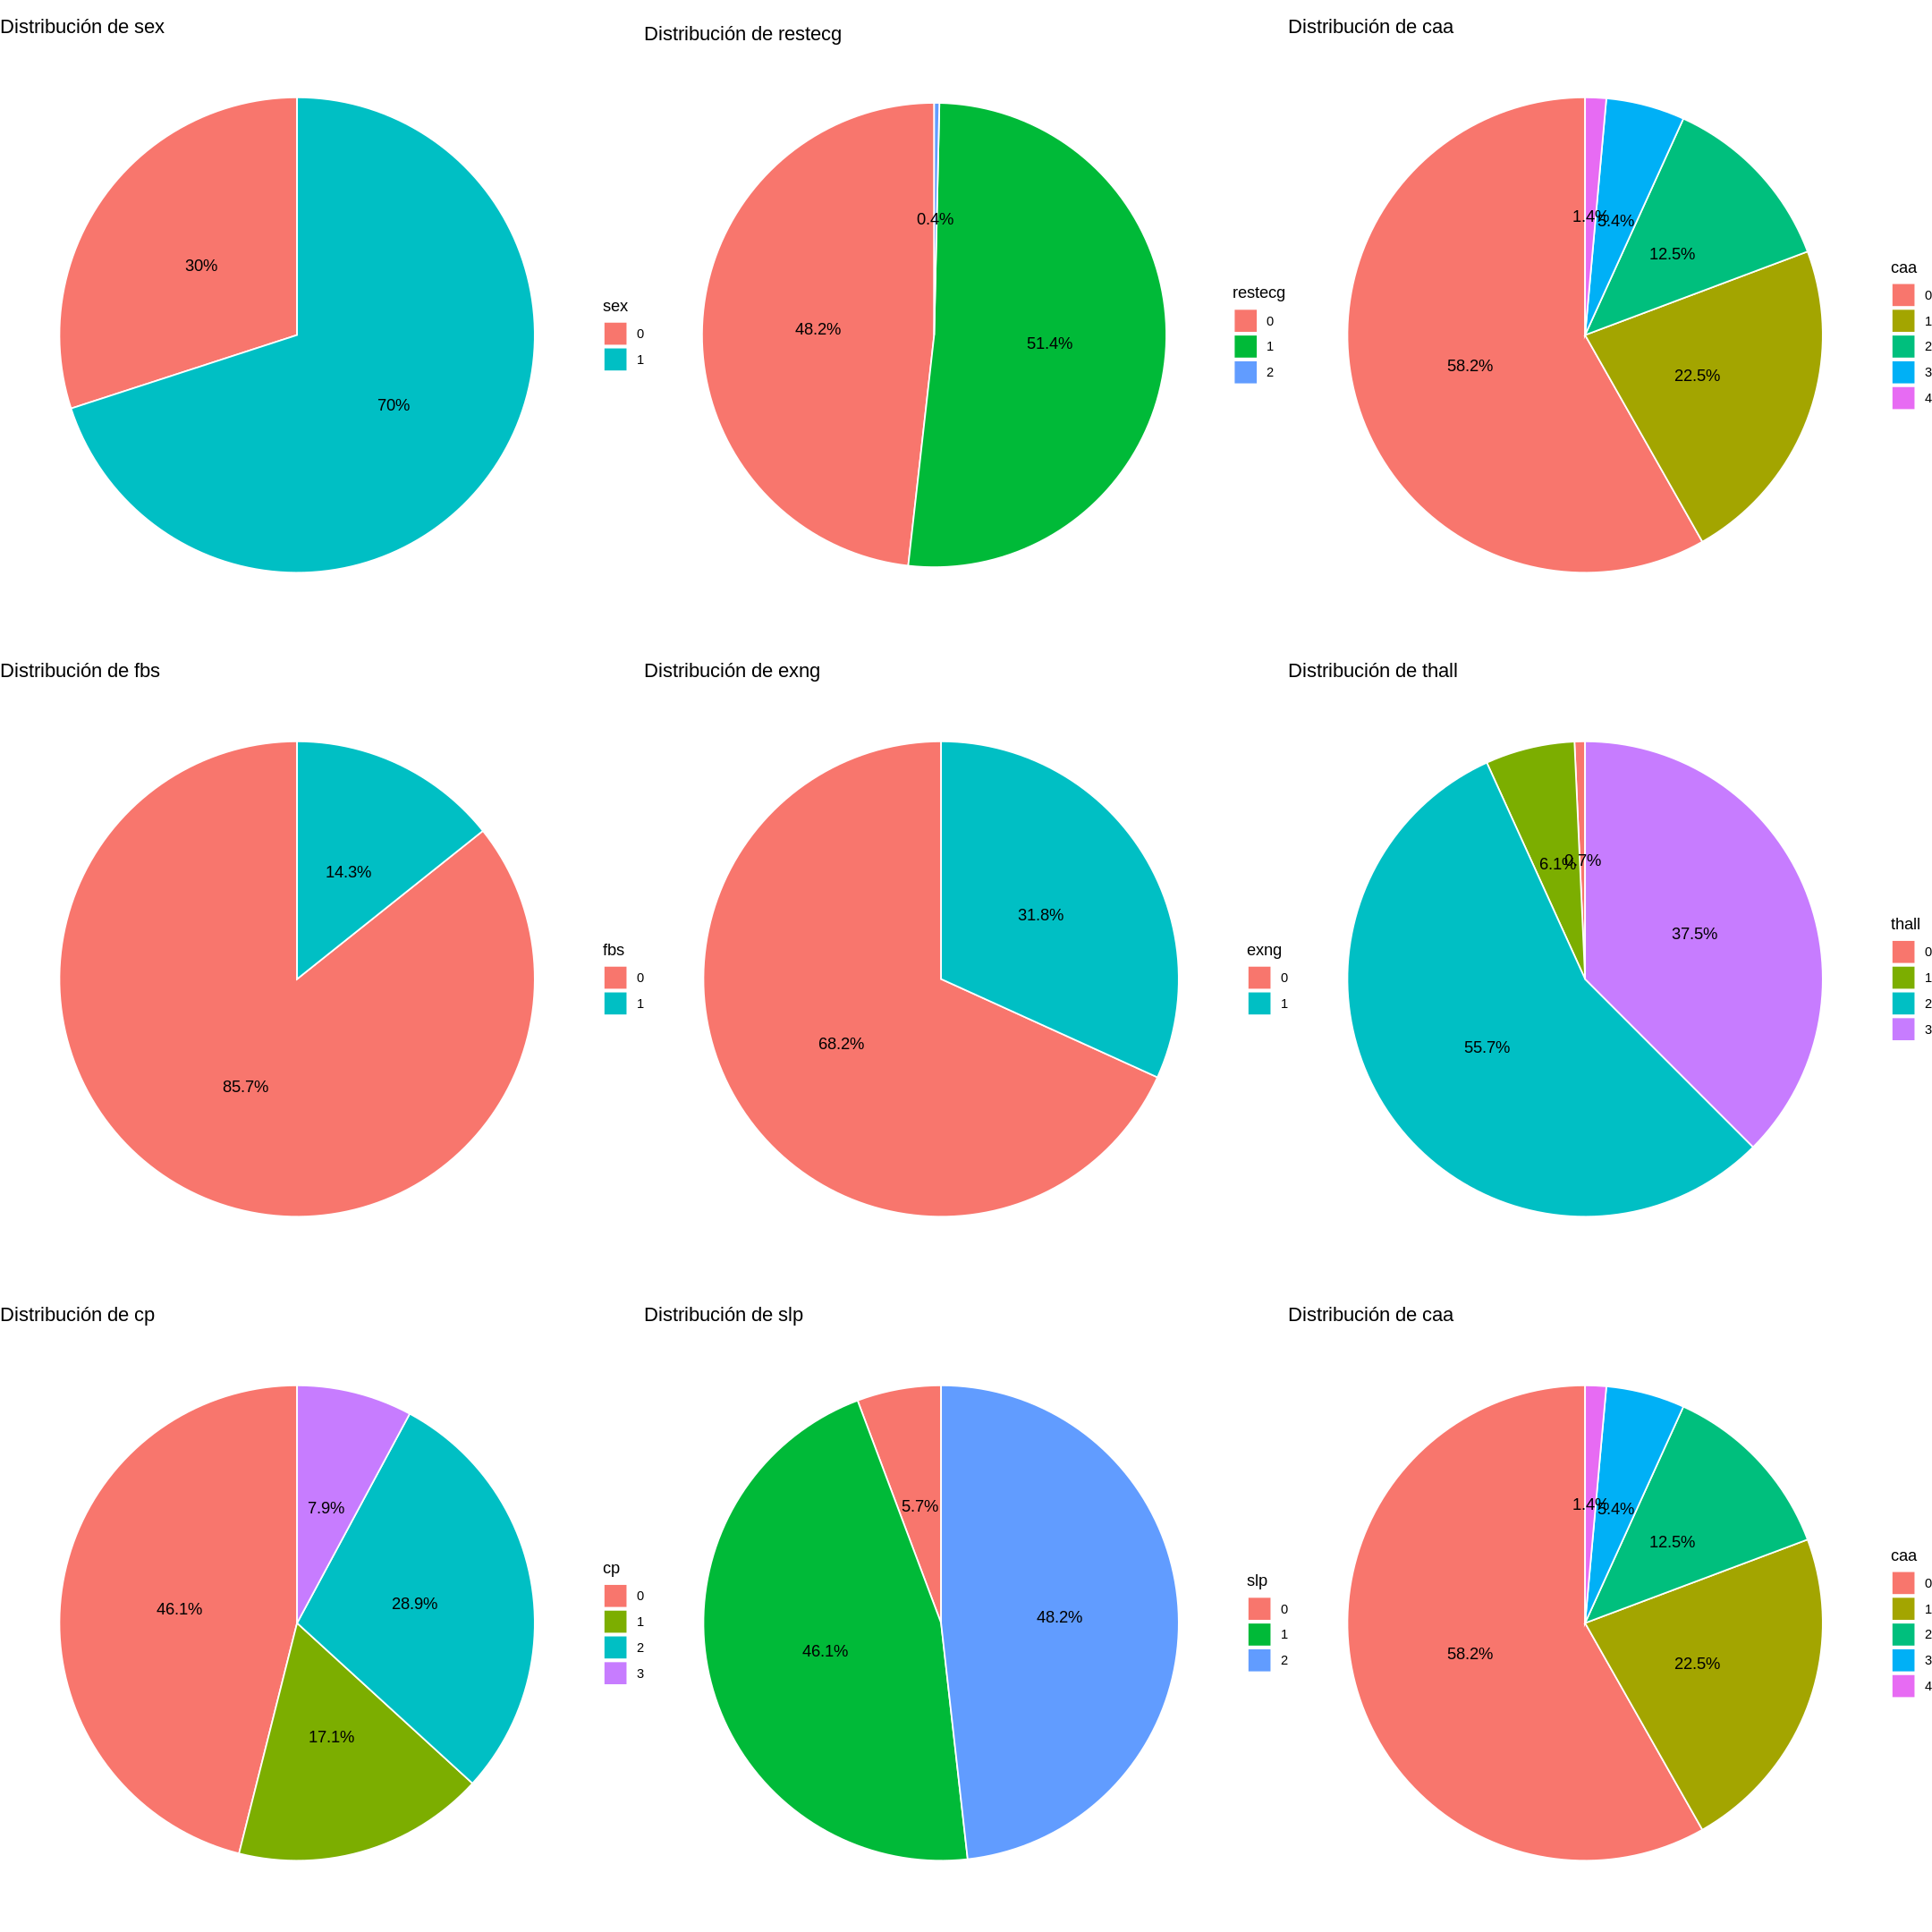

In [158]:
# Lista de variables categóricas
variables <- c("sex", "fbs", "cp", "restecg", "exng", "slp", "caa", "thall")

# Crear una lista para almacenar los gráficos de pastel
pie_list <- list()

# Crear los gráficos de pastel y añadirlos a la lista
for (variable in variables) {
  # Calcular las frecuencias de cada categoría
  frequencies <- table(data[[variable]])

  # Calcular los porcentajes de cada categoría
  percentages <- prop.table(frequencies) * 100

  # Convertir las frecuencias y porcentajes en un data frame
  pie_data <- data.frame(category = names(frequencies), frequency = as.vector(frequencies), percentage = as.vector(percentages))

  # Crear el gráfico de pastel para la variable actual
  pie_chart <- ggplot(pie_data, aes(x = "", y = percentage, fill = category)) +
    geom_bar(width = 1, color = "white", stat = "identity") +
    labs(title = paste("Distribución de", variable)) +
    coord_polar(theta = "y") +
    scale_fill_discrete(name = variable) +
    theme_void() +
    geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5))
  
  # Añadir el gráfico a la lista
  pie_list[[variable]] <- pie_chart
}

# Obtener el número de gráficos y calcular el número de filas
num_graficos <- length(pie_list)
num_filas <- ceiling(num_graficos / 3)

# Configurar el tamaño de los gráficos
ancho_grafico <- 500
alto_grafico <- 400

# Unir los gráficos en una matriz de 3 columnas
pie_matrix <- do.call(rbind, lapply(seq(1, num_graficos, 3), function(i) {
  pie_list[i:min(i+2, num_graficos)]
}))

# Configurar el tamaño de la salida en Colab
options(repr.plot.width = 18, repr.plot.height = 6 * num_filas)

# Imprimir la matriz de gráficos
grid.arrange(grobs = pie_matrix, ncol = 3)


<div class="alert alert-block alert-info">
  <strong>Análisis:</strong>
  <ul>
    <li><strong>Cp (Dolor en el pecho):</strong>
      <ul>
        <li>46.1% La mayoría de los pacientes son asintomáticos, tienen dolor pero sin síntomas.</li>
        <li>Uno de cada 4 pacientes es decir el 29%; tienen una angina típica, es decir los pacientes tienen dificultad para respirar o un dolor no clásico.</li>
        <li>El 17% de los pacientes tienen dolor no anginoso, dolor que surge durante cualquier actividad física.</li>
        <li>El 8% de los pacientes, tienen dolor torácico no cardiaco, es el término para describir el dolor torácico que no es causado por una enfermedad cardiaca.</li>
      </ul>
    </li>
    <li><strong>fbs (Azúcar en la sangre en ayunas):</strong>
      <ul>
        <li>La gran mayoría de los pacientes 85%; tienen valor 0, osea tienen un valor menor de 120 miligramos por decilitro.</li>
        <li>El 15% de los pacientes tienen un nivel de sangre en ayunas superior a 120 miligramos por decilitro.</li>
      </ul>
    </li>
    <li><strong>restecg (resultados del ecocardiograma en reposo):</strong>
      <ul>
        <li>El porcentaje de pacientes con hipertrofia (Crecimiento excesivo y anormal de un órgano o de una parte de él debido a un aumento del tamaño de sus células) es casi inexistente 0.4%.</li>
        <li>El 51% muestra que los resultados del electrocardiograma en reposo de estos pacientes es anormal.</li>
        <li>El 48% de los pacientes tienen valores normales.</li>
      </ul>
    </li>
    <li><strong>exng: (Angina inducida por ejercicio):</strong>
      <ul>
        <li>Más del doble de los pacientes 68% no tienen angina relacionada con el ejercicio.</li>
        <li>El 32% tienen la angina al hacer cualquier tipo de ejercicio.</li>
      </ul>
    </li>
    <li><strong>slp: (Pendiente del segmento ST de ejercicio):</strong>
      <ul>
        <li>El 5.8% de los pacientes tienen una longitud de onda de inclinación hacia abajo.</li>
        <li>La longitud de onda para el 46% de los pacientes es recta.</li>
        <li>La longitud de onda para el 48% de las pacientes tiene una pendiente ascendente.</li>
      </ul>
    </li>
  </ul>
</div>


Metodo generico para graficar

In [104]:
plot_percentages <- function(df, column_name, title) {
  # Crear un nuevo data frame con los conteos y porcentajes
  df_percent <- df %>%
    group_by(!!sym(column_name)) %>%
    summarise(count = n(), .groups = "drop") %>%
    mutate(percent = count / sum(count))
  
  # Crear el gráfico de barras
  ggplot(df_percent, aes(x = as.factor(!!sym(column_name)), y = percent, fill = as.factor(!!sym(column_name)))) +
    geom_bar(stat = "identity") +
    geom_text(aes(label = paste0(round(percent * 100, 1), "%")), vjust = -0.5) +
    geom_text(aes(label = count), position = position_stack(vjust = 0.5), color = "white") + # Agrega la cantidad de registros
    scale_y_continuous(labels = percent_format()) +
    scale_fill_brewer(palette = "Dark2") +
    theme_minimal() +
    ggtitle(title) +
    xlab(column_name) +
    ylab("Percent") +
    theme(plot.title = element_text(hjust = 0.5))
}


Al analizar la variable objetivo se observa un dataset balanceado, donde estan marcados como 0 los pacientes con menor probabilidad de infarto con un porcentaje de 45.7% y con 1 los pacientes con mayor probabilidad de enfermedad cardiaca con un porcentaje de 54.3%.

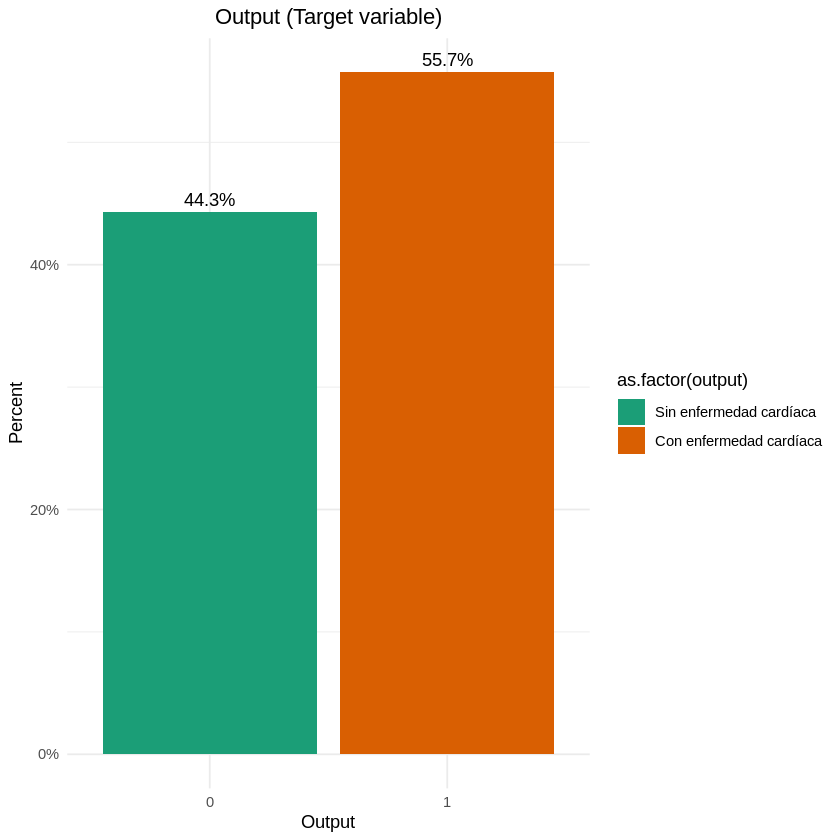

In [106]:
# Crear un nuevo data frame con los conteos y porcentajes
data_percent <- data %>%
  group_by(output) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(percent = count / sum(count))

# Crear el gráfico de barras
ggplot(data_percent, aes(x = as.factor(output), y = percent, fill = as.factor(output))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percent * 100, 1), "%")), vjust = -0.5) +
  scale_y_continuous(labels = percent_format()) +
  scale_fill_brewer(palette = "Dark2", labels = c("Sin enfermedad cardíaca", "Con enfermedad cardíaca")) +
  theme_minimal() +
  ggtitle("Output (Target variable)") +
  xlab("Output") +
  ylab("Percent") +
  theme(plot.title = element_text(hjust = 0.5))

Genero: Los datos se distribuyen con una porcentaje de 31.8% para mujeres y un 68.2% para hombres.

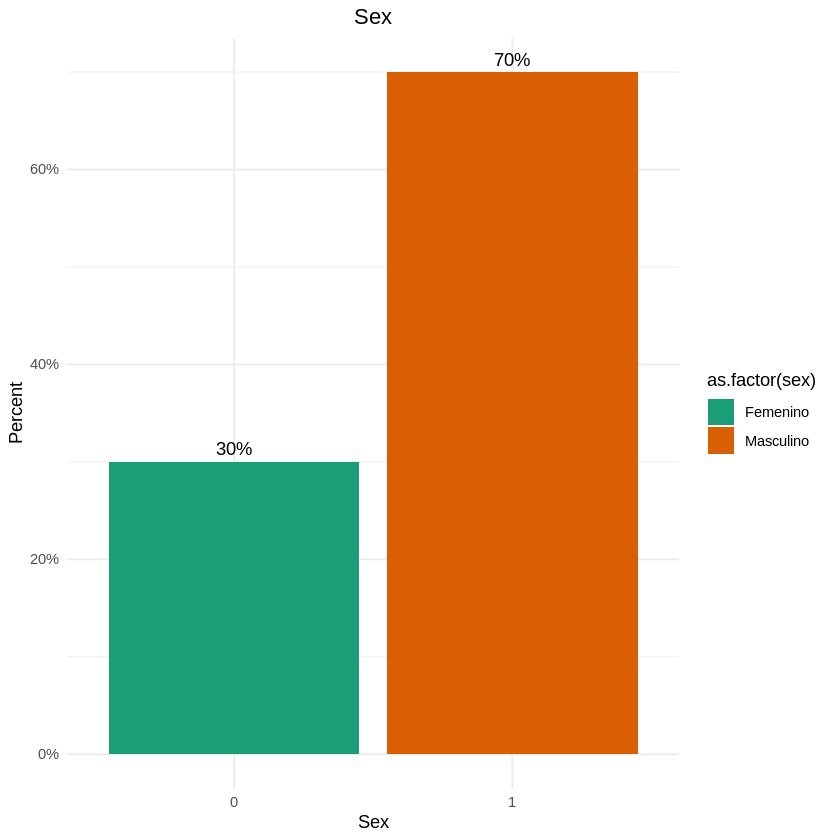

In [ ]:
# Crear un nuevo data frame con los conteos y porcentajes
data_percent <- data %>%
  group_by(sex) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(percent = count / sum(count))

# Crear el gráfico de barras
ggplot(data_percent, aes(x = as.factor(sex), y = percent, fill = as.factor(sex))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percent * 100, 1), "%")), vjust = -0.5) +
  scale_y_continuous(labels = percent_format()) +
  scale_fill_brewer(palette = "Dark2", labels = c("Femenino", "Masculino")) +
  theme_minimal() +
  ggtitle("Sex") +
  xlab("Sex") +
  ylab("Percent") +
  theme(plot.title = element_text(hjust = 0.5))

Al analizar la relación entre el género y la presencia de enfermedad cardíaca, se puede observar que existe una mayor propensión en las mujeres a tener un mayor riesgo de padecerla. Por otro lado, en los hombres, prevalece la probabilidad de no tener enfermedad cardíaca. Sin embargo, se debe tener en cuenta que estas observaciones pueden estar influenciadas por la distribución de género en el conjunto de datos. Aunque es un dato interesante se debe  recordar que las relaciones observadas en los datos son puramente asociativas y no indican causalidad.

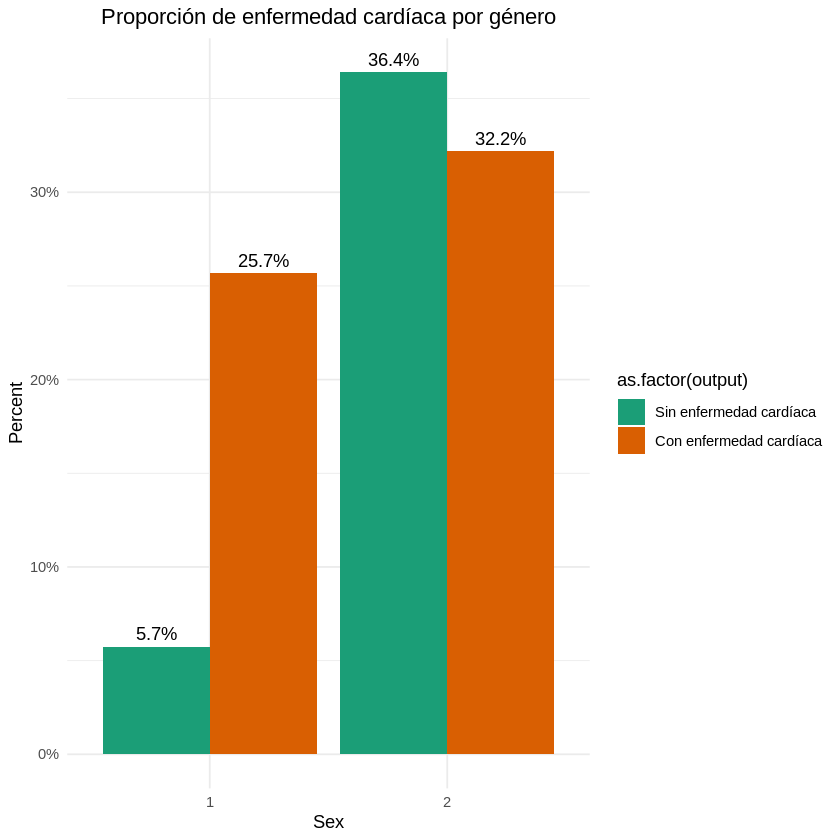

In [ ]:
# Crear un nuevo data frame con los conteos y porcentajes
data_percent <- data %>%
  group_by(sex, output) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(percent = count / sum(count))

# Crear el gráfico de barras
ggplot(data_percent, aes(x = as.factor(sex), y = percent, fill = as.factor(output))) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = paste0(round(percent * 100, 1), "%")), vjust = -0.5, position = position_dodge(0.9)) +
  scale_y_continuous(labels = scales::percent_format()) +
  scale_fill_brewer(palette = "Dark2", labels = c("Sin enfermedad cardíaca", "Con enfermedad cardíaca")) +
  theme_minimal() +
  ggtitle("Proporción de enfermedad cardíaca por género") +
  xlab("Sex") +
  ylab("Percent") +
  theme(plot.title = element_text(hjust = 0.5))

Edad: Para esta grafica los grupos con mayor cantidad de observaciones se presentan en un varde mas oscuro , destacando los grupos de edades de 53, 58 y 59.

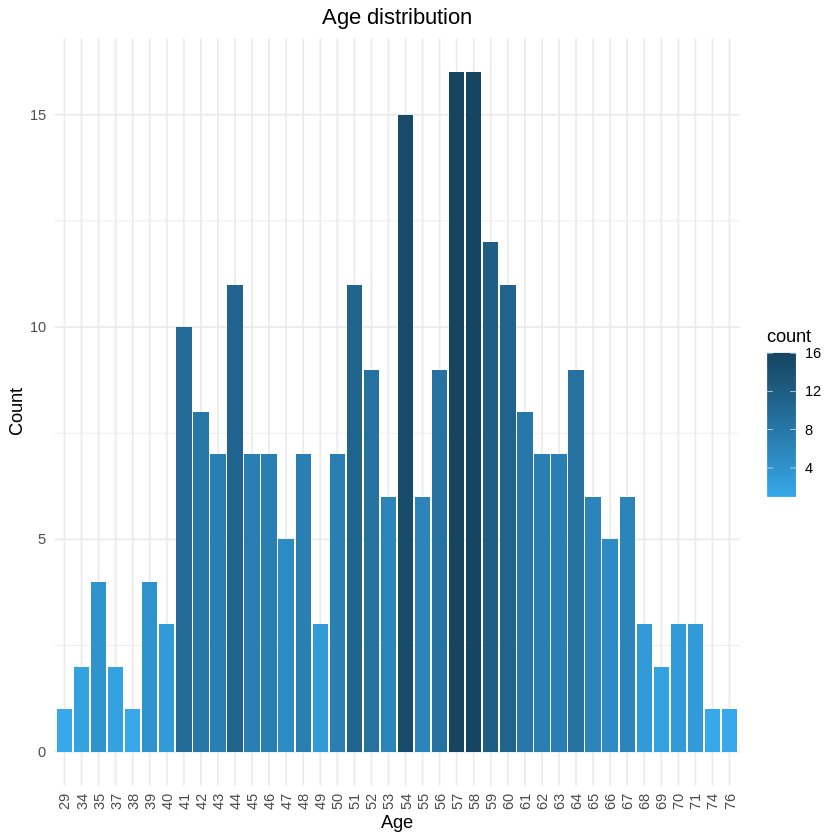

In [ ]:
# Crear el gráfico de conteo
ggplot(data, aes(x = as.factor(age), fill = ..count..)) +
  geom_bar() +
  scale_fill_gradient(low = "#36A8EB", high = "#164561") +
  theme_minimal() +
  ggtitle("Age distribution") +
  xlab("Age") +
  ylab("Count") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


Correlación(entre mas oscuro mas correlación)

In [ ]:
# Calcular la matriz de correlación
cor_matrix <- cor(data)

# Crear el mapa de calor
corrplot(cor_matrix, method = "color", type = "upper", 
         title = "Correlation matrix", tl.col = "black", tl.srt = 45)

cor_matrix

ERROR: ignored

Algunas observaciones interesantes de la matriz de correlación:

* "cp" (tipo de dolor en el pecho) y "output" (diagnóstico de enfermedad cardíaca) tienen una correlación positiva de 0.43. Esto sugiere que los pacientes con ciertos tipos de dolor en el pecho tienen más probabilidades de tener una enfermedad cardíaca.

* "thalachh" (frecuencia cardíaca máxima alcanzada) y "output" también tienen una correlación positiva de 0.42, lo que sugiere que los pacientes que alcanzan una frecuencia cardíaca más alta tienen más probabilidades de tener una enfermedad cardíaca.

* "exng" (angina inducida por el ejercicio) y "output" tienen una correlación negativa de -0.44, lo que sugiere que los pacientes que experimentan angina durante el ejercicio tienen menos probabilidades de tener una enfermedad cardíaca.

* "oldpeak" (depresión del ST inducida por el ejercicio en relación con el reposo) y "output" tienen una correlación negativa de -0.43, lo que sugiere que los pacientes que experimentan una mayor depresión del ST durante el ejercicio tienen menos probabilidades de tener una enfermedad cardíaca.

* "caa" (número de vasos sanguíneos coloreados por fluoroscopia) y "output" tienen una correlación negativa de -0.41, lo que sugiere que los pacientes con más vasos sanguíneos coloreados tienen menos probabilidades de tener una enfermedad cardíaca.

Tipo de Dolor de Pecho: La angina típica (0) es la más común, con 143 casos, seguida de la angina no anginal (2) con 86 casos, la angina atípica (1) con 50 casos, y finalmente la más baja es la asintomática (3) con solo 23 casos.

Además, se puede observar que las personas con angina típica (0) representan el 46% de todas las personas en el estudio.

In [ ]:
plot_percentages(data, 'cp', 'Tipo Dolor de Pecho')

Glicemia en ayunas: Mientras que 257 personas tenían una glucemia inferior a 120 mg/dl, 45 tenían una glucemia superior a la normal.

In [ ]:
plot_percentages(data, 'fbs', 'Glicemia en ayunas')

Resultados Electrocardiogramas en reposo: 151 personas presentaron normalidad en la onda ST-T (1), 147 personas fueron catalogadas como normales (0) y 4 personas presentaron hipertrofia ventricular izquierda (2)

In [ ]:
plot_percentages(data, 'restecg', 'Electrocardiogramas en reposo')

Angina inducida por el ejercicio: Solo el 32.7% presento angina a causa del esfuerzo fisico contra un 67.3% que no presentaron.

In [ ]:
plot_percentages(data, 'exng', 'Angina inducida por el ejercicio')

Presión arterial en reposo: La tensión arterial ideal se considera entre 90/60mmHg y 120/80mmH. ¿¿Los datos tienden a tener una distrubicón normal??

In [ ]:
ggplot(data, aes(x = trtbps)) + 
  geom_histogram(aes(y = ..density..), bins = 30, fill = "steelblue", alpha = 0.5) +
  geom_density(alpha = 0.7, colour = "darkblue") +
  theme_minimal() +
  ggtitle("Resting blood pressure") +
  xlab("Resting Blood Pressure") +
  ylab("Density") +
  theme(plot.title = element_text(hjust = 0.5))

Colesterol: Como regla  general se considera un valor normal cuando el colesterol esta por debajo de 200; aunque esto puede variar dependiendo del genero y otros factores.

In [ ]:
ggplot(data, aes(x = chol)) + 
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "steelblue", alpha = 0.5) +
  geom_density(alpha = 0.7, colour = "darkblue") +
  geom_vline(aes(xintercept=200), color="red", linetype="dashed", linewidth=1) +
  theme_minimal() +
  ggtitle("Cholesterol") +
  xlab("Cholesterol") +
  ylab("Density") +
  theme(plot.title = element_text(hjust = 0.5))

Thalachh: La frecuencia cardíaca máxima se basa en su edad, para estimar su frecuencia cardíaca máxima relacionada con la edad, reste su edad de 220.

In [ ]:
ggplot(data, aes(x = thalachh)) + 
  geom_histogram(aes(y = ..density..), bins = 30, fill = "steelblue", alpha = 0.5) +
  geom_density(alpha = 0.7, colour = "darkblue") +
  theme_minimal() +
  ggtitle("Thalachh") +
  xlab("Thalachh") +
  ylab("Density") +
  theme(plot.title = element_text(hjust = 0.5))

Diving deep: Los ataques cardíacos son más probables entre los 40 y los 55 años.

In [ ]:
# Crear el histograma
ggplot(data, aes(x = age, fill = as.factor(output))) + 
  geom_histogram(position = "identity", alpha = 0.5, bins = 30, aes(y = ..density..)) +
  geom_density(data = data[data$output == 0, ], aes(x = age), fill = NA, colour = "darkblue", alpha = 1) +
  geom_density(data = data[data$output == 1, ], aes(x = age), fill = NA, colour = "darkred", alpha = 1) +
  geom_vline(aes(xintercept = 40), colour = "green", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = 55), colour = "purple", linetype = "dashed", size = 1) +
  theme_minimal() +
  ggtitle("Age vs chance of heart attack") +
  xlab("Age") +
  ylab("Density") +
  scale_fill_discrete(name = "Output", labels = c("Lower chance", "Higher chance")) +
  theme(plot.title = element_text(hjust = 0.5))


Hay un aumento en la presión arterial en reposo a medida que envejece.

In [ ]:
# Analisis en rangos de 5 años
data$age_range <- cut(data$age, breaks = seq(20, 80, by = 5))

# calculamos la presión arterial media para cada rango de edad
average_bps <- data %>%
  group_by(age_range) %>%
  summarise(mean_trtbps = mean(trtbps, na.rm = TRUE))

# Graficar promedios
ggplot(average_bps, aes(x = age_range, y = mean_trtbps)) + 
  geom_point() +
  geom_line(group = 1) +
  theme_minimal() +
  ggtitle("Average Resting Blood Pressure by Age Range") +
  xlab("Age Range") +
  ylab("Average Resting Blood Pressure") +
  theme(plot.title = element_text(hjust = 0.5))


Hay un aumento en el colesterol a medida que se envejece, pero no parece haber una relación en una mayor probabilidad de ataque cardíaco con un aumento en el colesterol y la edad.

In [ ]:
# Divide el dataset en dos basado en el valor de 'output'
data_high_risk <- data[data$output == 1, ]
data_low_risk <- data[data$output == 0, ]

# Igualar informacion eje y
y_min <- min(min(data_high_risk$chol, na.rm = TRUE), min(data_low_risk$chol, na.rm = TRUE))
y_max <- max(max(data_high_risk$chol, na.rm = TRUE), max(data_low_risk$chol, na.rm = TRUE))


# Scatter plot para el grupo de alto riesgo
plot_high_risk <- ggplot(data_high_risk, aes(x = age, y = chol)) +
  geom_point(alpha = 0.5, colour = "red") +
  geom_smooth(method = "lm", se = FALSE, colour = "black") +
  ggtitle("High risk group") +
  xlab("Age") +
  ylab("Cholesterol") +
  ylim(y_min, y_max) +
  theme_minimal()

# Scatter plot para el grupo de bajo riesgo
plot_low_risk <- ggplot(data_low_risk, aes(x = age, y = chol)) +
  geom_point(alpha = 0.5, colour = "blue") +
  geom_smooth(method = "lm", se = FALSE, colour = "black") +
  ggtitle("Low risk group") +
  xlab("Age") +
  ylab("Cholesterol") +
  ylim(y_min, y_max) +
  theme_minimal()

grid.arrange(plot_high_risk, plot_low_risk, ncol = 2)


Selección de grupos de datos:

En este estudio, se realiza un análisis detallado para entender las variables que pueden influir en la prevalencia de enfermedades cardíacas, una de las principales causas de muerte a nivel global. Se plantea una comparación específica entre dos grupos: individuos diagnosticados con enfermedad cardíaca (output = 1) y aquellos sin dicha condición (output = 0). Las variables independientes consideradas incluyen la edad, la presión arterial en reposo, y los niveles de colesterol, entre otros. Al diferenciar entre estos dos grupos, se espera obtener una perspectiva más clara de cómo los factores de salud y estilo de vida están asociados a las enfermedades cardíacas. Este análisis está diseñado para mejorar la comprensión general de los factores de riesgo relacionados con estas enfermedades.

In [ ]:
# Separación de los grupos de interes
data_with_disease <- subset(data, output == 1)
data_without_disease <- subset(data, output == 0)

Vamos a comparar la media de la edad, la presión arterial en reposo (trtbps) y el colesterol (chol) en estos dos grupos.

In [ ]:
# Calcular la media de la edad, la presión arterial en reposo y el colesterol para cada grupo
mean_age_with_disease <- mean(data_with_disease$age)
mean_age_without_disease <- mean(data_without_disease$age)

mean_trtbps_with_disease <- mean(data_with_disease$trtbps)
mean_trtbps_without_disease <- mean(data_without_disease$trtbps)

mean_chol_with_disease <- mean(data_with_disease$chol)
mean_chol_without_disease <- mean(data_without_disease$chol)

cat("Edad Promedio Pacientes con Dx Enfermedad Cardiaca : ", mean_age_with_disease, "\n")
cat("Edad Promedio Pacientes sin Dx Enfermedad Cardiaca : ", mean_age_without_disease, "\n")

cat("Presión Arterial Promedio Pacientes con Dx Enfermedad Cardiaca : ", mean_trtbps_with_disease, "\n")
cat("Presión Arterial Pacientes sin Dx Enfermedad Cardiaca : ", mean_trtbps_without_disease, "\n")

cat("Colesterol Promedio Pacientes con Dx Enfermedad Cardiaca : ", mean_chol_with_disease, "\n")
cat("Colesterol Pacientes sin Dx Enfermedad Cardiaca : ", mean_chol_without_disease, "\n")


Edad Promedio Pacientes con Dx Enfermedad Cardiaca :  52.23179 
Edad Promedio Pacientes sin Dx Enfermedad Cardiaca :  55.9 
Presión Arterial Promedio Pacientes con Dx Enfermedad Cardiaca :  128.3113 
Presión Arterial Pacientes sin Dx Enfermedad Cardiaca :  131.0818 
Colesterol Promedio Pacientes con Dx Enfermedad Cardiaca :  238.9404 
Colesterol Pacientes sin Dx Enfermedad Cardiaca :  246.2545 


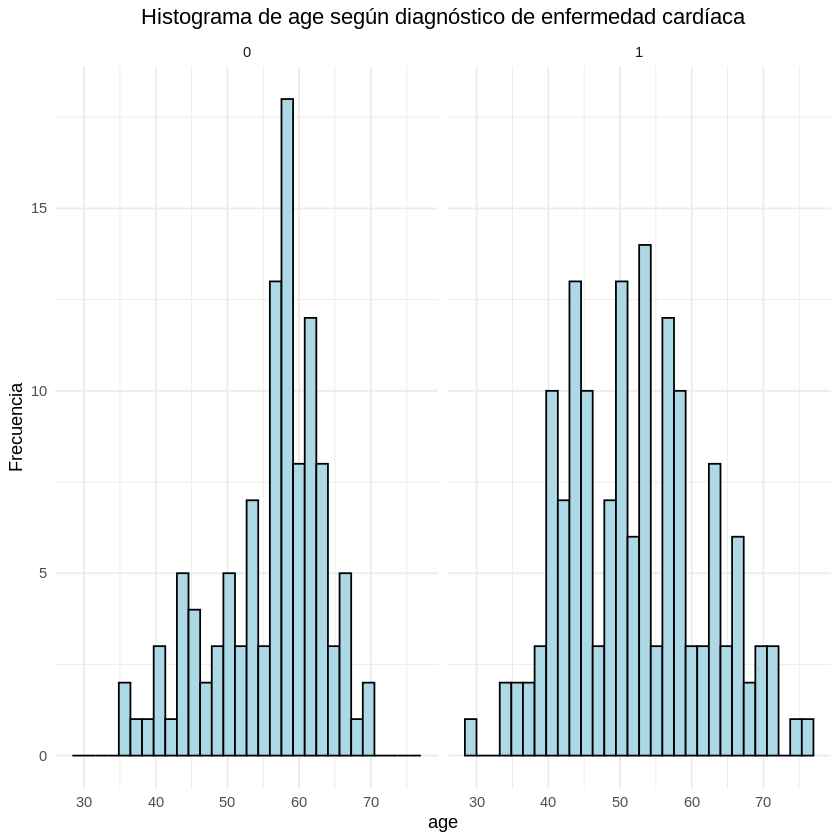

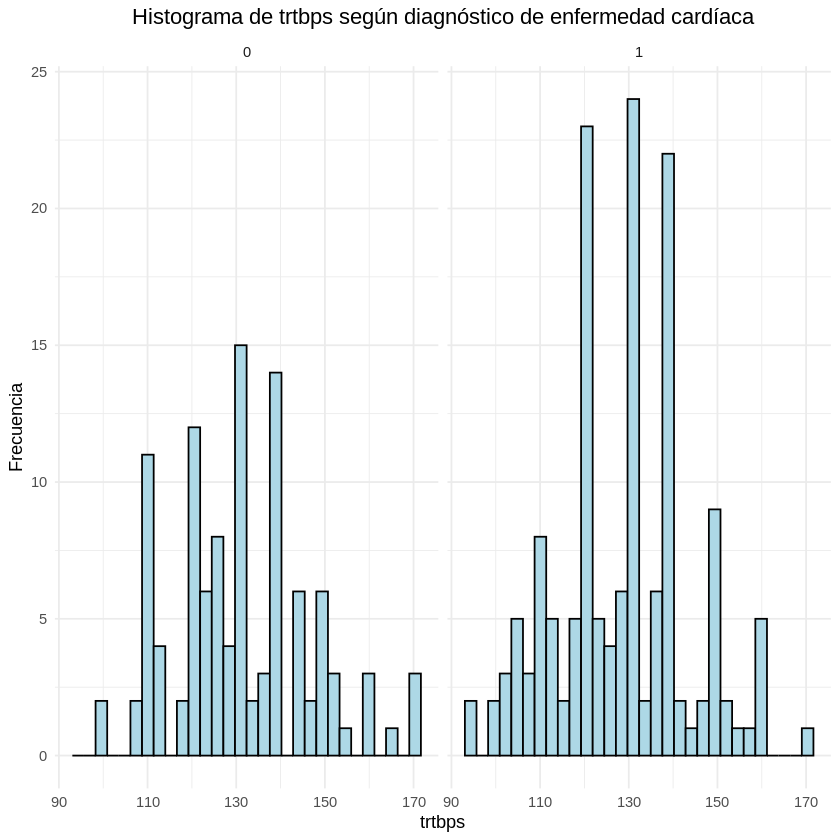

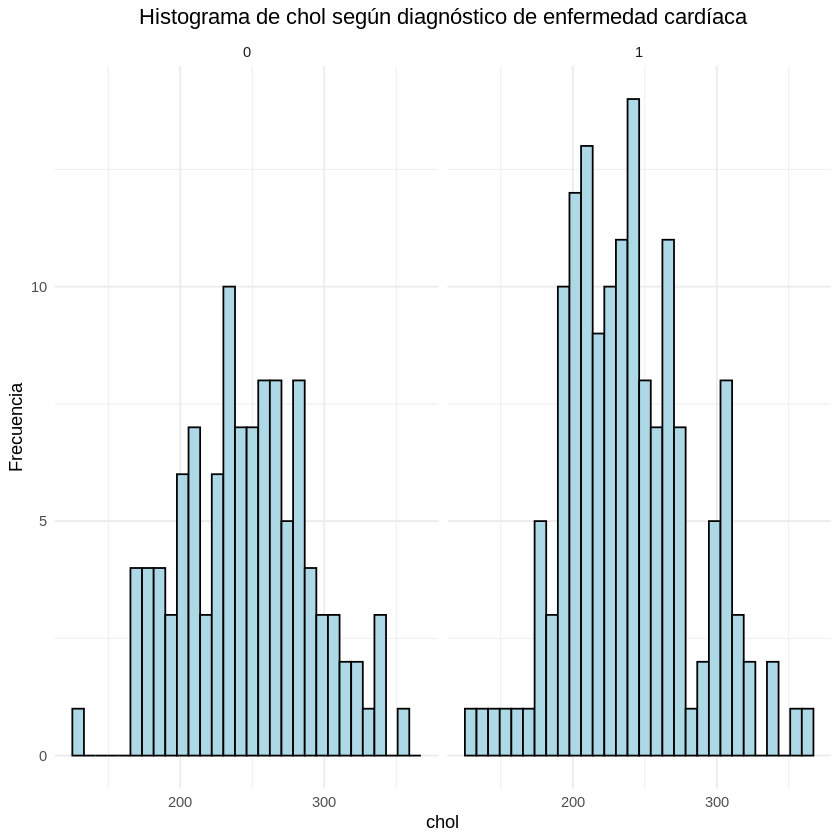

In [ ]:
# Generar histogramas para las variables de interés
variables <- c("age", "trtbps", "chol")
for (var in variables) {
  p <- ggplot(data, aes(.data[[var]])) +
    geom_histogram(bins = 30, fill = "lightblue", color = "black") +
    facet_grid(. ~ output) +
    labs(title = paste("Histograma de", var, "según diagnóstico de enfermedad cardíaca"),
         x = var,
         y = "Frecuencia") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))
  print(p)
}


 **Comprobación de la normalidad y homogeneidad de la varianza.**

Comprobemos la normalidad de la distribución de los datos con la prueba de Shapiro-Wilk. Esta prueba verifica la hipótesis nula de que una muestra proviene de una distribución normal

In [ ]:
# Prueba de Shapiro-Wilk para verificar la normalidad
variables <- c("age", "trtbps", "chol")
for (var in variables) {
  print(paste("Prueba de Shapiro-Wilk para", var, "en pacientes con enfermedad cardíaca:"))
  print(shapiro.test(data[data$output == 1, var])$p.value)
  print(paste("Prueba de Shapiro-Wilk para", var, "en pacientes sin enfermedad cardíaca:"))
  print(shapiro.test(data[data$output == 0, var])$p.value)
}

[1] "Prueba de Shapiro-Wilk para age en pacientes con enfermedad cardíaca:"
[1] 0.09412208
[1] "Prueba de Shapiro-Wilk para age en pacientes sin enfermedad cardíaca:"
[1] 0.0002196768
[1] "Prueba de Shapiro-Wilk para trtbps en pacientes con enfermedad cardíaca:"
[1] 0.1113796
[1] "Prueba de Shapiro-Wilk para trtbps en pacientes sin enfermedad cardíaca:"
[1] 0.02473958
[1] "Prueba de Shapiro-Wilk para chol en pacientes con enfermedad cardíaca:"
[1] 0.1212876
[1] "Prueba de Shapiro-Wilk para chol en pacientes sin enfermedad cardíaca:"
[1] 0.8966547


Los resultados de la prueba de Shapiro-Wilk indican lo siguiente:

* Para la variable 'age', la distribución es normal en pacientes con enfermedad cardíaca (p = 0.094 > 0.05) y no es normal en pacientes sin enfermedad cardíaca (p = 0.0002 < 0.05).

* Para la variable 'trtbps', la distribución es normal en pacientes con enfermedad cardíaca (p = 0.111 > 0.05) y no es normal en pacientes sin enfermedad cardíaca (p = 0.024 < 0.05).

* Para la variable 'chol', la distribución es normal en ambos grupos, tanto en pacientes con enfermedad cardíaca (p = 0.121 > 0.05) como en pacientes sin enfermedad cardíaca (p = 0.897 > 0.05).

Por lo tanto, la hipótesis nula de normalidad se acepta para 'age', 'trtbps' en pacientes con enfermedad cardíaca y 'chol' en ambos grupos. Se rechaza para 'age' y 'trtbps' en pacientes sin enfermedad cardíaca.

Comprobemos la homogeneidad de la varianza con la prueba de Levene. Esta prueba verifica la hipótesis nula de que todas las muestras de los grupos provienen de poblaciones con varianzas iguales

In [ ]:
# Prueba de Levene para verificar la homogeneidad de la varianza
for (var in variables) {
  print(paste("Prueba de Levene para", var, ":"))
  print(leveneTest(data[, var], data$output))
}

[1] "Prueba de Levene para age :"


Warning message in leveneTest.default(data[, var], data$output):
“data$output coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
       Df F value   Pr(>F)   
group   1  8.1656 0.004616 **
      259                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "Prueba de Levene para trtbps :"


Warning message in leveneTest.default(data[, var], data$output):
“data$output coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.0762 0.7827
      259               
[1] "Prueba de Levene para chol :"


Warning message in leveneTest.default(data[, var], data$output):
“data$output coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.1957 0.6586
      259               


Los resultados de la prueba de Levene indican lo siguiente:

* Para la variable 'age', la varianza no es homogénea entre los grupos (p = 0.0046 < 0.05), lo que significa que la varianza en la edad de los pacientes con enfermedad cardíaca es significativamente diferente a la varianza en la edad de los pacientes sin enfermedad cardíaca.

* Para la variable 'trtbps', la varianza es homogénea entre los grupos (p = 0.7827 > 0.05), lo que significa que no hay una diferencia significativa en la varianza de la presión arterial en reposo entre los pacientes con y sin enfermedad cardíaca.

* Para la variable 'chol', la varianza es homogénea entre los grupos (p = 0.6586 > 0.05), lo que significa que no hay una diferencia significativa en la varianza del nivel de colesterol entre los pacientes con y sin enfermedad cardíaca.

Por lo tanto, la hipótesis nula de homogeneidad de la varianza se acepta para 'trtbps' y 'chol', y se rechaza para 'age'. 

**Aplicación de pruebas estadísticas para comparar los grupos de datos.**

**Pruebas de contraste de hipótesis**: Vamos a realizar pruebas t para comparar las medias de las variables 'age', 'trtbps', y 'chol' entre los dos grupos. Pero antes de eso, necesitamos considerar si los datos son normales y si las varianzas son iguales.

En el caso de 'age', los datos no son normales y las varianzas no son iguales. Por lo tanto, vamos a utilizar la prueba t de Welch, que no asume igualdad de varianzas.

Para 'trtbps' y 'chol', los datos no son normales, pero las varianzas son iguales. Normalmente, si los datos no son normales, optaríamos por una prueba no paramétrica como la prueba de Mann-Whitney-Wilcoxon. Sin embargo, la prueba t es bastante robusta ante la violación de la normalidad si el tamaño de la muestra es grande (como en este caso) y las distribuciones no son muy sesgadas. Por lo tanto, vamos a proceder con la prueba t de Student.

In [ ]:
# Prueba t de Welch para 'age'
t.test(age ~ output, data = data, var.equal = FALSE)

# Prueba t de Student para 'trtbps'
t.test(trtbps ~ output, data = data, var.equal = TRUE)

# Prueba t de Student para 'chol'
t.test(chol ~ output, data = data, var.equal = TRUE)


	Welch Two Sample t-test

data:  age by output
t = 3.4032, df = 255.75, p-value = 0.0007728
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 1.545600 5.790824
sample estimates:
mean in group 0 mean in group 1 
       55.90000        52.23179 



	Two Sample t-test

data:  trtbps by output
t = 1.4336, df = 259, p-value = 0.1529
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -1.035069  6.576188
sample estimates:
mean in group 0 mean in group 1 
       131.0818        128.3113 



	Two Sample t-test

data:  chol by output
t = 1.3159, df = 259, p-value = 0.1894
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -3.630943 18.259239
sample estimates:
mean in group 0 mean in group 1 
       246.2545        238.9404 



Los resultados de las pruebas t proporcionan evidencia para sugerir que hay diferencias significativas en la edad promedio entre los pacientes con enfermedad cardíaca y aquellos sin ella. La prueba t de Welch para la edad muestra un valor p significativo (p = 0.0007728), lo que indica que la diferencia en las medias de edad entre estos dos grupos no es cero.

Sin embargo, no encontramos diferencias significativas en las variables de presión arterial (trtbps) y colesterol (chol) entre los dos grupos. Los valores p para estas dos pruebas fueron 0.1529 y 0.1894 respectivamente, lo cual es mayor que el umbral típico de 0.05 utilizado para determinar la significancia estadística.

Estos resultados podrían sugerir que la edad puede ser un factor importante en la predicción de la enfermedad cardíaca, mientras que la presión arterial y el colesterol no parecen diferir significativamente entre los individuos con y sin enfermedad cardíaca en este conjunto de datos específico.

**Correlación**: Identifiquemos si existe correlación entre la edad, la presión arterial y los niveles de colesterol

In [ ]:

correlation_matrix <- cor(data[, c('age', 'trtbps', 'chol')], use="complete.obs")

print(correlation_matrix)

             age     trtbps       chol
age    1.0000000 0.27891957 0.13381220
trtbps 0.2789196 1.00000000 0.09566647
chol   0.1338122 0.09566647 1.00000000


* Age vs. trtbps: 0.2789196, que indica una correlación positiva débil. Esto sugiere que a medida que la edad aumenta, la presión arterial tiende a aumentar también, pero el efecto es débil.
* Age vs. chol: 0.1338122, que indica una correlación positiva muy débil, casi nula. Esto sugiere que la edad y el colesterol no están fuertemente relacionados.
* trtbps vs. chol: 0.09566647, que indica una correlación positiva muy débil, casi nula. Esto sugiere que la presión arterial y el colesterol no están fuertemente relacionados.

**Regresión**: La regresión trata de modelar la relación entre una variable dependiente y una o más variables independientes. En nuestro caso, podríamos querer predecir la presencia de enfermedades del corazón en función de la edad, la presión arterial y los niveles de colesterol

In [ ]:
linear_model <- lm(output ~ age + trtbps + chol, data=data)

summary(linear_model)


Call:
lm(formula = output ~ age + trtbps + chol, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8042 -0.5108  0.2763  0.4273  0.6626 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.3993953  0.3071537   4.556 8.06e-06 ***
age         -0.0100923  0.0034956  -2.887  0.00422 ** 
trtbps      -0.0010288  0.0020375  -0.505  0.61403    
chol        -0.0005987  0.0006869  -0.872  0.38427    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4865 on 257 degrees of freedom
Multiple R-squared:  0.04425,	Adjusted R-squared:  0.03309 
F-statistic: 3.966 on 3 and 257 DF,  p-value: 0.008667


El resultado de la regresión nos permite entender la relación entre la variable dependiente (output) y las variables independientes (age, trtbps, chol).

* Age: El coeficiente de -0.0100923 indica que por cada año adicional de edad, la probabilidad de tener una enfermedad del corazón disminuye ligeramente, manteniendo constantes los demás factores. Esta relación es significativa a nivel 0.01 (como indica el asterisco).
* trtbps: El coeficiente de -0.0010288 indica que por cada unidad adicional de presión arterial, la probabilidad de tener una enfermedad del corazón disminuye ligeramente, manteniendo constantes los demás factores. Sin embargo, este resultado no es estadísticamente significativo (p > 0.05).
* chol: El coeficiente de -0.0005987 indica que por cada unidad adicional de colesterol, la probabilidad de tener una enfermedad del corazón disminuye ligeramente, manteniendo constantes los demás factores. Sin embargo, este resultado no es estadísticamente significativo (p > 0.05).

El R-cuadrado (Multiple R-squared) es 0.04425, lo que indica que solo alrededor del 4.4% de la variación en la presencia de enfermedad del corazón se puede explicar por las variables de edad, presión arterial y colesterol en este modelo.

Modelo de Regresión Logistica

In [ ]:
# Construir el modelo
logistic_model <- glm(output ~ age + trtbps + chol, data = data, family = binomial)

# Resumen del modelo
summary(logistic_model)


Call:
glm(formula = output ~ age + trtbps + chol, family = binomial, 
    data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  3.854041   1.346845   2.862  0.00422 **
age         -0.043331   0.015306  -2.831  0.00464 **
trtbps      -0.004320   0.008623  -0.501  0.61640   
chol        -0.002607   0.002917  -0.894  0.37133   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 355.36  on 260  degrees of freedom
Residual deviance: 343.53  on 257  degrees of freedom
AIC: 351.53

Number of Fisher Scoring iterations: 4


* age: La estimación para la edad es negativa, lo que sugiere que a medida que la edad aumenta, la posibilidad de tener una enfermedad cardíaca disminuye, manteniendo todo lo demás constante. Específicamente, por cada aumento de un año en la edad, el log-odds de tener enfermedad cardíaca disminuye en 0.043, en promedio. El p-valor asociado es menor a 0.05, lo que indica que este efecto es estadísticamente significativo.

* trtbps: La presión arterial (trtbps) también tiene una estimación negativa, pero su p-valor es bastante alto (0.616), lo que indica que no hay suficiente evidencia para afirmar que la presión arterial tiene un efecto significativo en la posibilidad de tener enfermedad cardíaca, manteniendo todo lo demás constante.

* chol: El colesterol (chol) también tiene una estimación negativa y un p-valor alto (0.371), lo que indica que no hay suficiente evidencia para afirmar que el colesterol tiene un efecto significativo en la posibilidad de tener enfermedad cardíaca, manteniendo todo lo demás constante.

En resumen, de las tres variables independientes, solo la edad parece tener un efecto estadísticamente significativo en la posibilidad de tener enfermedad cardíaca, según este modelo.